https://www.kaggle.com/datasets/blastchar/telco-customer-churn

<h1><center>Churn Prediction Part 1</center></h1> 
<h2><center>Exploratory Data Analysis, Statistical Testing</center></h2>
<center><img src="https://uploads-ssl.webflow.com/60d45d63543dd9baaad4cb28/60d85fd90743e2299c711be5_1%20dqSLRSEC2GDV9bw_PplCYQ.png" align="center"/></center>

### [source of notebook](https://www.kaggle.com/code/ahmedshahriarsakib/churn-prediction-i-eda-statistical-analysis)

# Table of Contents
* [1. Introduction ](#1)
  * [1.1 Insights & Summary](#1.1)
* [2. Libraries & Configurations ](#2)
  * [2.1 Import Libraries](#2.1)
  * [2.2 Configurations](#2.2)
* [3 Descriptive Analysis](#3)
  * [3.1 Checking Duplicates](#3.1)
  * [3.2 Summary of Categorical Features](#3.2)
  * [3.3 Unique Values](#3.3)
* [4 Data Wrangling ](#4)
  * [4.1 Missing Values](#4.1)
    * [4.1.1 Change Data Type](#4.1.1)
    * [4.1.2 Imputation](#4.1.2)
  * [4.2 Binning](#4.2)
    * [4.2.1 Tenure](#4.2.1)
    * [4.2.2 MonthlyCharges](#4.2.2)
    * [4.2.3 TotalCharges](#4.2.3)
* [5 Univariate Analysis](#5)
  * [5.1 Statistical Normality Tests](#5.1)
    * [5.1.1 D’Agostino’s K^2 Test](#5.1.1)
    * [5.1.2 Anderson-Darling Test](#5.1.2)
  * [5.2 Visualization](#5.2)
* [6 Bivariate Analysis](#6)
  * [6.1 List Feature Based on Types](#6.1)
  * [6.2 Numerical & Numerical](#6.2)
      * [6.2.1 Spearman rank-order correlation](#6.2.1)
  * [6.3 Numerical & Categorical](#6.3)
    * [6.3.1 Kendall rank correlation coefficient](#6.3.1)
    * [6.3.2 Mann-Whitney U Test](#6.3.2)
    * [6.3.3 Polytomous(Nominal) with numeric](#6.3.3)
  * [6.4 Dichotomous & Dichotomous](#6.4)
    * [6.4.1 Phi’s correlation](#6.4.1)
  * [6.5 Categorical & categorical](#6.5)
    * [6.5.1 Chi-Square](#6.5.1)
    * [6.5.2 Cramér’s V](#6.5.2)
    * [6.5.3 Uncertainty Coefficient](#6.5.3)
  * [6.6 Collinearity](#6.6)
    * [6.6.1 Chi-Square](#6.6.1)
  * [6.7 Visualization](#6.7)
* [7 Multivariate Analysis](#7)
  * [7.1 Multicollinearity (Kruskal–Wallis)](#7.1)
  * [7.2 Frequency Distribution](#7.2)
  * [7.3 Churn Count Distribution](#7.3)
    * [7.3.1 Features With Cardinality = 2](#7.3.1)
    * [7.3.2 Features With Cardinality = 3](#7.3.2)
* [8 Save Cleaned Dataset](#8)
* [9 Conclusion](#9)
* [10 References](#10)

<a id='1'></a>
# 1 Introduction

The objective of this notebook is to present an extensive analysis of the **IBM Customer Churn Dataset** and to predict the customer churn rate. The project is divided into two notebooks. This part will focus on the statistical exploration of the dataset and the other part will demonstrate stacking ensemble model building with **XGBoost**, **Catboost** and **LightGBM** along with hyperparameter optimization using Optuna.

Part 2 of this project : [Churn Prediction Part2 : Triple Boost Stack+Optuna](https://www.kaggle.com/ahmedshahriarsakib/churn-prediction-part2-triple-boost-stack-optuna) 

Dataset Source :

* [Kaggle Dataset URL](https://www.kaggle.com/blastchar/telco-customer-churn)
* [GitHub Dataset URL](https://github.com/IBM/telco-customer-churn-on-icp4d/tree/master/data)

You can also : 
* Check the **GitHub Project Repository**

[![](https://img.shields.io/badge/Customer%20Churn%20Prediction-GitHub-100000?logo=github&logoColor=white)](https://github.com/ahmedshahriar/Customer-Churn-Prediction)

* View the Project in **Jupyter Notebook Html**

[![Open in HTML](https://img.shields.io/badge/Html-Open%20Notebook-blue?logo=HTML5)](https://nbviewer.org/github/ahmedshahriar/Customer-Churn-Prediction/blob/main/Telco-Customer-Churn-Prediction.html) 

* Open The GitHub Project in **Binder**

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ahmedshahriar/Customer-Churn-Prediction/main)

* View the **Streamlit App** of this Project **Live** (**This app was featured in [Streamlit Weekly Roundup](https://discuss.streamlit.io/t/weekly-roundup-streamlit-as-a-powerpoint-google-trends-excel-file-updates-and-more/19045#finance-and-business-9)**)

[![Live in Streamlit](https://static.streamlit.io/badges/streamlit_badge_black_white.svg)](https://share.streamlit.io//ahmedshahriar/Telco-Customer-Churn-Prediction-Streamlit-App/main/app.py)

NB: This project also serves as my assignments for the courses below - 
1. [IBM Exploratory Data Analysis for Machine Learning](https://www.coursera.org/learn/ibm-exploratory-data-analysis-for-machine-learning?specialization=ibm-machine-learning)
2. [IBM Supervised Machine Learning: Classification](https://www.coursera.org/learn/supervised-machine-learning-classification?specialization=ibm-machine-learning)

<a id='1.1'></a>

## 1.1 Insights & Summary

* Dataset mostly has categorical variables
* Performed statistical hypothesis test based on data types to check normality, correlation and multicollinearity
* Performed nonparametric statistical tests for the features which are not normally distributed
* All statistical tests were performed with a 95% confidence level (i.e., p value < 0.05)

<a id='2'></a>
# 2 Libraries & Configurations

<a id='2.1'></a>
## 2.1 Import Libraries 

In [2]:
"""Import basic modules"""
import math
import os
import gc
import random
import pprint
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns

# Warning Libraries 
import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from scipy import stats                         # For statistics
from scipy.stats.contingency import association # upgrade scipy to use this to calculate Cramer's V

"""Plotly visualization"""
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
  

"""scikit-learn modules"""
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer # convert to Gaussian-like data
from sklearn.feature_selection import chi2
from sklearn.metrics import matthews_corrcoef

import multiprocessing
import pickle, joblib


from IPython.display import Markdown, display

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))


sns.set_style('whitegrid')

init_notebook_mode(connected=True) # to display plotly graph offline

%matplotlib inline

In [3]:
# customize as needed
plt_params = {
    # 'figure.facecolor': 'white',
    'axes.facecolor' : 'white',

    ## to set size 
    # 'legend.fontsize': 'x-large',
    # 'figure.figsize': (15, 10),
    # 'axes.labelsize': 'x-large',
    # 'axes.titlesize': 'x-large',
    # 'xtick.labelsize': 'x-large',
    # 'ytick.labelsize': 'x-large'
}

plt.rcParams.update(plt_params)

<a id='2.2'></a>
## 2.2 Configurations

In [4]:
# padding value to print left padded string
left_padding = 21

# seed value
SEED = 42

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)

<a id='3'></a>
# 3 Descriptive Analysis

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Contains customer ID</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>whether the customer female or male</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Whether the customer is a senior citizen or not (1, 0)</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Whether the customer has a partner or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Whether the customer has dependents or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Number of months the customer has stayed with the company</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Whether the customer has a phone service or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Whether the customer has multiple lines r not (Yes, No, No phone service)</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Customer’s internet service provider (DSL, Fiber optic, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Whether the customer has online security or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Whether the customer has online backup or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Whether the customer has device protection or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Whether the customer has tech support or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Whether the customer has streaming TV or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Whether the customer has streaming movies or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>The contract term of the customer (Month-to-month, One year, Two year)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>Whether the customer has paperless billing or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card)</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>The amount charged to the customer monthly </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>The total amount charged to the customer </td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Whether the customer churned or not (Yes or No)</td>
<td>categorical</td>
</tr>
</tbody>
</table>

In [5]:
df_churn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
printmd(f"Dataset Dimension: **{df_churn.shape[0]}** rows,  **{df_churn.shape[1]}** columns")

Dataset Dimension: **7043** rows,  **21** columns

In [7]:
df_churn.info()

printmd("<br>**SeniorCitizen** is already in integer form<br><br>**TotalCharges** should be converted to float")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<br>**SeniorCitizen** is already in integer form<br><br>**TotalCharges** should be converted to float

<a id='3.1'></a>
## 3.1 Checking Duplicates

In [7]:
print('Known observations: {}\nUnique observations: {}'.format(len(df_churn.index),len(df_churn.drop_duplicates().index)))

printmd("**No duplicates Found!**")

Known observations: 7043
Unique observations: 7043


**No duplicates Found!**

#### Drop **customerID** column

In [8]:
del df_churn["customerID"]

<a id='3.2'></a>
## 3.2 Summary of Categorical Features

In [9]:
df_churn.describe(include=['object']).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


<a id='3.3'></a>
## 3.3 Unique Values

In [10]:
printmd("**Unique Values By Features**")
for feature in df_churn.columns:
    uniq = np.unique(df_churn[feature])
    print(feature.ljust(left_padding),len(uniq))

**Unique Values By Features**

gender                2
SeniorCitizen         2
Partner               2
Dependents            2
tenure                73
PhoneService          2
MultipleLines         3
InternetService       3
OnlineSecurity        3
OnlineBackup          3
DeviceProtection      3
TechSupport           3
StreamingTV           3
StreamingMovies       3
Contract              3
PaperlessBilling      2
PaymentMethod         4
MonthlyCharges        1585
TotalCharges          6531
Churn                 2


<a id='4'></a>
# 4 Data Wrangling

<a id='4.1'></a>
## 4.1 Missing Values

In [11]:
df_churn.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
cat_cols = set(df_churn.columns) - set(df_churn._get_numeric_data().columns)

printmd("'**isna**' is only applicable for numerical data type<br>")
printmd("Checking missing values for object data type<br><br>")

for cat in cat_cols:
    print(cat.ljust(left_padding), df_churn[cat].apply(lambda x:len(x.strip()) == 0 or x.strip().lower() == 'nan').sum())

printmd("<br>TotalCharges is an object datatype, it has **11** 'nan' value")

'**isna**' is only applicable for numerical data type<br>

Checking missing values for object data type<br><br>

gender                0
MultipleLines         0
StreamingMovies       0
Partner               0
OnlineSecurity        0
OnlineBackup          0
InternetService       0
Contract              0
PaymentMethod         0
TechSupport           0
DeviceProtection      0
Churn                 0
Dependents            0
StreamingTV           0
PaperlessBilling      0
TotalCharges          11
PhoneService          0


<br>TotalCharges is an object datatype, it has **11** 'nan' value

<a id='4.1.1'></a>
### 4.1.1 Change Data Type

Convert **TotalCharges** to numeric

In [13]:
df_churn["TotalCharges"] = pd.to_numeric(df_churn["TotalCharges"], errors = 'coerce')

<a id='4.1.2'></a>

### 4.1.2 Imputation

In [14]:
indices_null_tc = df_churn[df_churn["TotalCharges"].isna()].index

In [15]:
display(df_churn.iloc[indices_null_tc])

printmd("<br>**'Tenure' (months stayed at the company) is correlated with 'TotalCharges' column**")
printmd("**when 'Tenure' is 0 , 'TotalCharges' is 0 too**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<br>**'Tenure' (months stayed at the company) is correlated with 'TotalCharges' column**

**when 'Tenure' is 0 , 'TotalCharges' is 0 too**

In [16]:
display(df_churn[df_churn.tenure == 1].head(2))

printmd("<br>**'TotalCharges' is the same as 'MonthlyCharges' when 'Tenure' is not 0**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes


<br>**'TotalCharges' is the same as 'MonthlyCharges' when 'Tenure' is not 0**

In [17]:
display(df_churn[df_churn.tenure == 3].head(2))

printmd("<br>**'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'**")
printmd("<br>From the above observation we can conclude that, **'TotalCharges'  = 'MonthlyCharges' x 'Tenure' + Extra Cost**")
printmd("**Therefore, imputing missing values on 'TotalCharges' column with 0**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
65,Female,0,No,No,3,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,75.3,244.1,No
74,Female,0,No,Yes,3,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.5,177.4,No


<br>**'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'**

<br>From the above observation we can conclude that, **'TotalCharges'  = 'MonthlyCharges' x 'Tenure' + Extra Cost**

**Therefore, imputing missing values on 'TotalCharges' column with 0**

In [18]:
df_churn['TotalCharges'].fillna(0, inplace=True)

In [19]:
df_churn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


<a id='4.2'></a>
## 4.2 Binning

There are three numerical data types which can be ranked based on their values :

* Tenure, MonthlyCharges and TotalCharges

We can bin them into three levels : **high, medium and low**

In [20]:
def binning_feature(feature):
    plt.hist(df_churn[feature])

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

    bins = np.linspace(min(df_churn[feature]), max(df_churn[feature]), 4)
    
    printmd("**Value Range**")
    
    printmd(f"Low ({bins[0] : .2f} - {bins[1]: .2f})")
    printmd(f"Medium ({bins[1]: .2f} - {bins[2]: .2f})")
    printmd(f"High ({bins[2]: .2f} - {bins[3]: .2f})")

    group_names = ['Low', 'Medium', 'High']

    df_churn.insert(df_churn.shape[1]-1,f'{feature}-binned', pd.cut(df_churn[feature], bins, labels=group_names, include_lowest=True))
    display(df_churn[[feature, f'{feature}-binned']].head(10))


    # count values
    printmd("<br>**Binning Distribution**<br>")
    display(df_churn[f'{feature}-binned'].value_counts())


    # plot the distribution of each bin
    plt.bar(group_names, df_churn[f'{feature}-binned'].value_counts())
    # px.bar(data_canada, x='year', y='pop')

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

<a id='4.2.1'></a>
### 4.2.1 Tenure

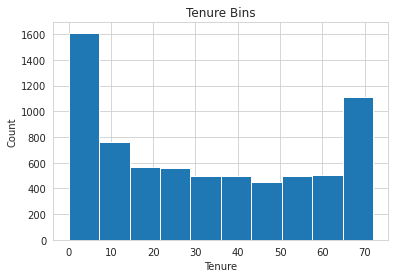

**Value Range**

Low ( 0.00 -  24.00)

Medium ( 24.00 -  48.00)

High ( 48.00 -  72.00)

,tenure,tenure-binned
0,1,Low
1,34,Medium
2,2,Low
3,45,Medium
4,2,Low
5,8,Low
6,22,Low
7,10,Low
8,28,Medium
9,62,High


<br>**Binning Distribution**<br>

Low       3210
High      2239
Medium    1594
Name: tenure-binned, dtype: int64

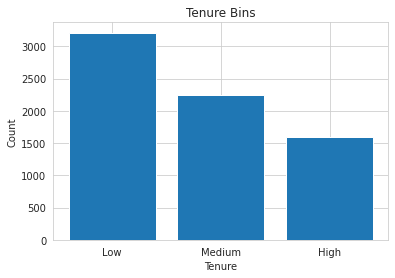

In [21]:
binning_feature('tenure')

<a id='4.2.2'></a>
### 4.2.2 MonthlyCharges

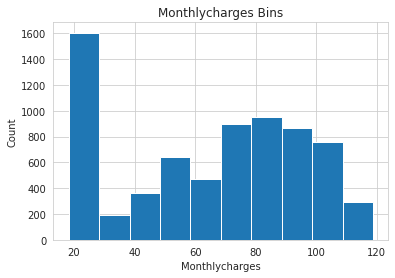

**Value Range**

Low ( 18.25 -  51.75)

Medium ( 51.75 -  85.25)

High ( 85.25 -  118.75)

,MonthlyCharges,MonthlyCharges-binned
0,29.85,Low
1,56.95,Medium
2,53.85,Medium
3,42.30,Low
4,70.70,Medium
5,99.65,High
6,89.10,High
7,29.75,Low
8,104.80,High
9,56.15,Medium


<br>**Binning Distribution**<br>

Low       2451
Medium    2439
High      2153
Name: MonthlyCharges-binned, dtype: int64

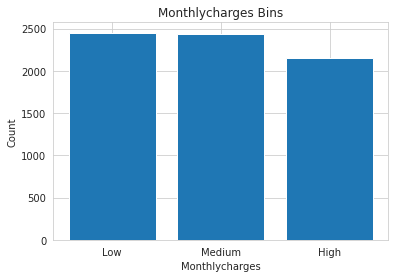

In [22]:
binning_feature('MonthlyCharges')

<a id='4.2.3'></a>
### 4.2.3 TotalCharges

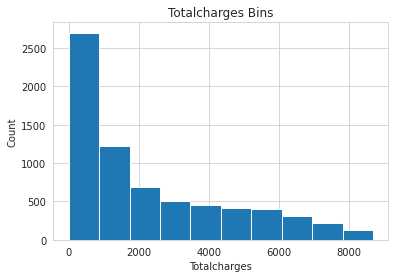

**Value Range**

Low ( 0.00 -  2894.93)

Medium ( 2894.93 -  5789.87)

High ( 5789.87 -  8684.80)

,TotalCharges,TotalCharges-binned
0,29.85,Low
1,1889.50,Low
2,108.15,Low
3,1840.75,Low
4,151.65,Low
5,820.50,Low
6,1949.40,Low
7,301.90,Low
8,3046.05,Medium
9,3487.95,Medium


<br>**Binning Distribution**<br>

Low       4782
Medium    1474
High       787
Name: TotalCharges-binned, dtype: int64

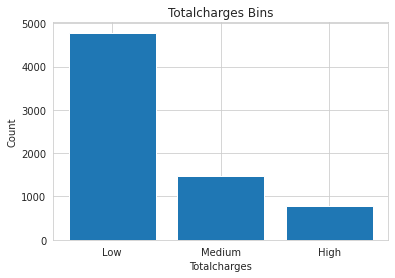

In [23]:
binning_feature('TotalCharges')

**Data Types Distribution after cleaning**

In [24]:
printmd("**Data Types**<br>")
df_churn.dtypes.value_counts()

**Data Types**<br>

object      16
category     3
int64        2
float64      2
dtype: int64

<a id='5'></a>
# 5 Univariate Analysis

<a id='5.1'></a>
## 5.1 Statistical Normality Tests

Normality tests are used to determine if a dataset is normally distributed and to check how likely it is for a random variable in the dataset to be normally distributed.

##Choosing a normality test [source](https://www.graphpad.com/guides/prism/latest/statistics/stat_choosing_a_normality_test.htm)

Popular normality tests -  D’Agostino’s K^2, Shapiro-Wilk, Anderson-Darling .

## D'Agostino-Pearson: assessing normality with shape
The D'Agostino-Pearson normality test first computes the `skewness` and `kurtosis` to quantify `how far the distribution is from Gaussian` in terms of asymmetry and shape. It then calculates how far each of these values differs from the value expected with a Gaussian distribution, and computes a single P value from the sum of these discrepancies. It is a versatile and powerful normality test, and is generally recommended. However, it should be noted that there are `exceptions` to this recommendation. Specifically, when a distribution has a skewness and kurtosis that are `very close to that of a normal distribution`, but are definitely non-normal, this test will not be able to identify the distribution as being non-normal. An example is the distribution below.

## Shapiro-Wilk: assessing normality with standard deviation
The Shapiro-Wilk normality test is another popular option when it comes to normality tests. Unlike the D’Agostino-Pearson test, the Shapiro-Wilk test doesn’t use the shape of the distribution to determine whether or not it is normal. Instead, it compares the `actual SD` of the data to the `SD computed from the slope of the QQ plot` for the data, and calculates their ratio. If the data are sampled from a Gaussian distribution, the two values will be similar, so the ratio will be close to 1.0, while a ratio much different from one would suggest a non-normal distribution. The Shapiro-Wilk test `works very well` if every value is `unique`, but does not work as well when `several values are identical`. The Shapiro-Wilk test performs better when the sample size is less than 5000.

## Anderson-Darling and Kolmogorov-Smirnov: assessing normality with cumulative distributions
The Anderson-Darling test and the Kolmogorov-Smirnov test both use the `cumulative distribution` to determine whether or not the data were sampled from a normal distribution. Both tests compare the actual cumulative distribution to the ideal cumulative distribution of a normal distribution. However, the two tests differ in how this comparison is made.

The `Anderson-Darling test` computes the `P value` by `comparing the cumulative distribution of your data set` against the `ideal cumulative distribution` of a Gaussian distribution. It takes into account the discrepancies at all parts of the cumulative distribution curve.

Unlike the Anderson-Darling test, `the Kolmogorov-Smirnov test` computes a P value from a `single value`: `the largest discrepancy between the cumulative distribution of the data and a cumulative Gaussian distribution`. This is not a very sensitive way to assess normality, and we now agree with this statement: `"The Kolmogorov-Smirnov test is only a historical curiosity. It should never be used."`.

## So what should I do?
Which test(s) should you use? One possible answer `is to not use any`. Normality tests are way less useful than many scientists believe. Another answer is `to run all of them and draw a conclusion by looking at all of the results`. If you must pick one normality test, we'd suggest using the `D'Agostino-Pearson test`, but this is a very "soft" recommendation. As demonstrated above, there are cases where this test will simply fail to identify a distribution as non-normal (when it clearly is NOT normal).


There are three numerical features in this dataset - **MonthlyCharges**, **Tenure**, and **TotalCharges**.


Hypotheses -

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

NB : we can not perform **Shapiro-Wilk Test** because sample size > 5000 and for this test p-value may not be accurate for N > 5000

<a id='5.1.1'></a>
### 5.1.1 D’Agostino’s K^2 Test

#### MonthlyCharges

In [25]:
stat, p = stats.normaltest(df_churn['MonthlyCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=11419.52879, p=0.000
Sample does not look Gaussian (reject H0)


#### Tenure

In [26]:
stat, p = stats.normaltest(df_churn['tenure'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=76258.50517, p=0.000
Sample does not look Gaussian (reject H0)


<a id='5.1.2'></a>
### 5.1.2 Anderson-Darling Test

`Critical values` in a statistical test are a range of pre-defined significance boundaries at which the H0 can be failed to be rejected if the calculated statistic is less than the critical value.

Rather than just a single p-value, this test returns a critical value for a **range of different commonly used significance levels**.

In this case  - **normal/exponential** (15%, 10%, 5%, 2.5%, 1%)

#### TotalCharges

In [27]:
result = stats.anderson(df_churn['TotalCharges'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

Statistic: 346.638
Significance level 15.00 % : critical value 0.576, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.656, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.787, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.917, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.091, data does not look normal (reject H0)


In [28]:
df_churn.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,Low,Low,Low,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,Medium,Medium,Low,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Low,Medium,Low,Yes


<a id='5.2'></a>
## 5.2 Visualization

### Churn (Target) Distribution

In [29]:
fig = px.pie(df_churn['Churn'].value_counts().reset_index().rename(columns={'index':'Type'}), values='Churn', names='Type', title='Churn (Target) Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
printmd("### Target distribution is Imbalanced")

### Target distribution is Imbalanced

### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport

In [30]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df_churn['OnlineSecurity'].value_counts().index, values=df_churn['OnlineSecurity'].value_counts().values, name="Online Security"),
              1, 1)
fig.add_trace(go.Pie(labels=df_churn['OnlineBackup'].value_counts().index, values=df_churn['OnlineBackup'].value_counts().values, name="Online Backup"),
              1, 2)
fig.add_trace(go.Pie(labels=df_churn['DeviceProtection'].value_counts().index, values=df_churn['DeviceProtection'].value_counts().values, name="Device Protection"),
              2, 1)
fig.add_trace(go.Pie(labels=df_churn['TechSupport'].value_counts().index, values=df_churn['TechSupport'].value_counts().values, name="Tech Support"),
              2, 2)

# donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent")

fig.update_layout(

    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Online<br>Security', x=0.195, y=0.85, font_size=20, showarrow=False),
                 dict(text='Online<br>Backup', x=0.804, y=0.86, font_size=20, showarrow=False),
                 dict(text='Device<br>Protection', x=0.192, y=0.18, font_size=20, showarrow=False),
                 dict(text='Tech<br>Support', x=0.805, y=0.18, font_size=20, showarrow=False)])
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()



printmd("### 'Online Backup', 'Device Protection' and 'Online Security', 'Tech Support' has similar distribution")

### 'Online Backup', 'Device Protection' and 'Online Security', 'Tech Support' has similar distribution

### PaymentMethod

In [31]:
display(px.pie(df_churn['PaymentMethod'].value_counts().reset_index().rename(columns={'index':'Type'}), values='PaymentMethod', names='Type', title='Payment Method Distribution'))

printmd("#### Majority of the customers use E-check")

#### Majority of the customers use E-check

### Gender

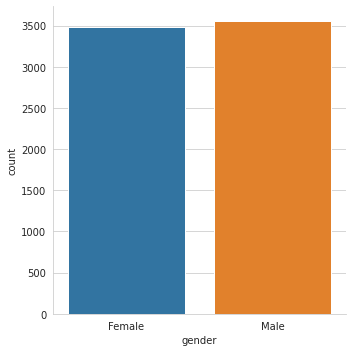

#### Approximately 50/50 gender ratio

In [32]:
sns.catplot(x="gender", kind="count", data=df_churn)
plt.show()

printmd("#### Approximately 50/50 gender ratio")

### Dependents

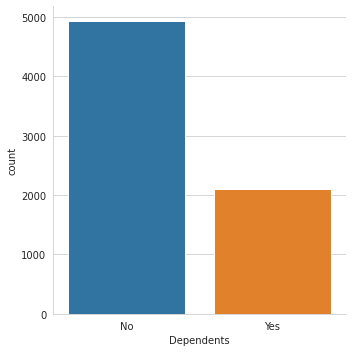

#### Users who have non-dependents are approximately two times more than users having dependents

In [33]:
sns.catplot(x="Dependents", kind="count", data=df_churn)
plt.show()

printmd("#### Users who have non-dependents are approximately two times more than users having dependents")

### Senior Citizen

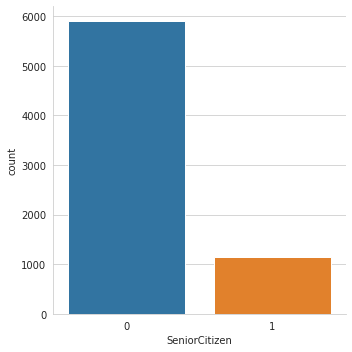

#### The majority of the users are not Senior Citizen

In [34]:
sns.catplot(x="SeniorCitizen", kind="count", data=df_churn)
plt.show()

printmd("#### The majority of the users are not Senior Citizen")

### Contract

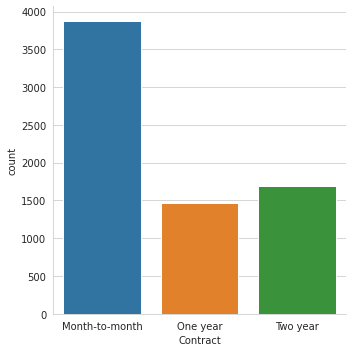

#### Most of the users prefer Month-to-month contract

In [35]:
sns.catplot(x="Contract", kind="count", data=df_churn)
plt.show()

printmd("#### Most of the users prefer Month-to-month contract")

### PaperlessBilling

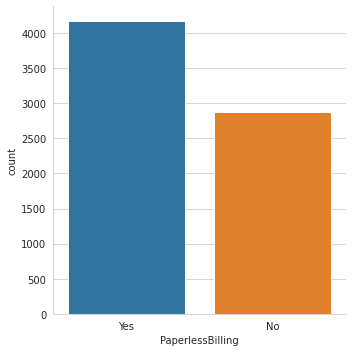

#### Most of the users prefer paperless billing

In [36]:
sns.catplot(x="PaperlessBilling", kind="count", data=df_churn)
plt.show()

printmd("#### Most of the users prefer paperless billing")

### Total Charges

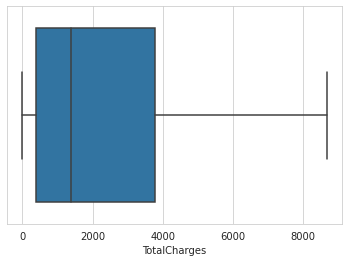

#### The total charges fall under 4000 for majority of the users

In [37]:
sns.boxplot(x=df_churn["TotalCharges"])
plt.show()

printmd("#### The total charges fall under 4000 for majority of the users")

### Numerical Features

In [38]:
"""#1.Create a function to plot histogram and density plot."""
def plot_histogram(feature):
    """Plots histogram and density plot of a variable."""
    
    # Create subplot object
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"Distribution of {feature.name} with Histogram", f"Distribution of {feature.name} with Density Plot"))
    
    # This is a count histogram
    fig.add_trace(
        go.Histogram(
            x = feature,
            hoverinfo="x+y"
        ),
    row=1,col=1)

    # This is a density histogram
    fig.add_trace(
        go.Histogram(
            x = feature,
            hoverinfo="x+y",
            histnorm = "density"
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        hovermode="closest"
        )
    
    # Update axes
    fig.layout.yaxis1.update(title="<b>Abs Frequency</b>")
    fig.layout.yaxis2.update(title="<b>Density(%)</b>")
    fig.layout.xaxis2.update(title=f"<b>{feature.name}</b>")
    return fig.show()

In [39]:
plot_histogram(df_churn['tenure'])

printmd("**Tenure is U-shaped distributed**")

**Tenure is U-shaped distributed**

In [40]:
plot_histogram(df_churn['MonthlyCharges'])

printmd("**MonthlyCharges is heavily skewed**")

**MonthlyCharges is heavily skewed**

In [41]:
plot_histogram(df_churn['TotalCharges'])

printmd("**TotalCharges is reversed J-shaped distributed**")

**TotalCharges is reversed J-shaped distributed**

## Correlation Measurements Overview [source](https://ishanjainoffical.medium.com/choosing-the-right-correlation-pearson-vs-spearman-vs-kendalls-tau-02dc7d7dd01d)

![image](photos/levels-of-measurement-1.png)

Pearson Correlation, Spearman Rank Correlation, and Kendall’s Tau Rank Correlation are all methods used to measure the strength and direction of relationships between variables.

### 1. Pearson Correlation
- Assumption: Assumes a `linear relationship` and that data is `normally distributed`.
- Use Case: Suitable for `continuous data` when you want to `measure linear associations`.
- Strength: `Sensitive to linear relationships`, good for capturing linear trends.
- Formula: Based on `covariance and standard deviations` of the original data.
- Interpretation: Measures the strength and direction of the linear relationship, `ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation)`, with `0 indicating no linear correlation`.

### 2. Spearman Rank Correlation
- Assumption: `Non-parametric` and `does not assume a linear relationship` but assumes a `monotonic relationship`.
- Use Case: Appropriate for `both continuous and ordinal data`. Particularly useful when the relationship is `expected to be monotonic` but `not necessarily linear`.
- Strength: `Robust to outliers` and `non-linearity`.
- Formula: Calculates the correlation based on the `ranks of data points`.
- Interpretation: Measures the strength and direction of the monotonic relationship, similar to Kendall’s Tau.

### 3. Kendall’s Tau Rank Correlation
- Assumption: `Non-parametric` and makes `no assumptions about the data distribution`.
- Use Case: Suitable for `both continuous and ordinal (ranked) data`. Useful when the data `may not follow a linear relationship`.
- Strength: `Robust to outliers` and `non-linearity`.
- Interpretation: Measures the similarity in ranking order between two variables, where 1 indicates perfect agreement, -1 indicates perfect disagreement, and 0 suggests no association.

### Let’s look at the key differences:
- Assumptions: Pearson correlation assumes linearity and normality, while Kendall and Spearman correlations make fewer assumptions about data distribution.
- Data Type: Pearson is best suited for continuous data, while Kendall and Spearman can handle ordinal (ranked) data.
- Robustness: Kendall and Spearman are more robust to outliers and non-linear relationships compared to Pearson.
- Interpretation: Kendall and Spearman measure monotonic relationships, while Pearson measures linear relationships.
- Strength of Association: Pearson is sensitive to both the magnitude and direction of linear associations, while Kendall and Spearman focus on the direction and orderings of data.
- Calculation: Pearson is based on the raw data, while Kendall and Spearman use rankings.
The choice between these correlation methods depends on your data type, assumptions, and the type of relationship you are interested in exploring.

It’s often a good practice to calculate and interpret multiple correlation coefficients to gain a comprehensive understanding of the data.

<a id='6'></a>
# 6 Bivariate Analysis

In this section, I did an extensive statistical analysis with various hypotheses testing based on paired data types - 

* numerical and numerical data
* numerical and ordinal data
* ordinal and ordinal data
* categorical and categorical data


#### General Hypotheses - 

* **H0: the two samples are independent**
* **H1: there is a dependency between the samples**

<a id='6.1'></a>
## 6.1 List Feature Based on Types

In [42]:
# Check cardinality of categorical variables 
target_col_filter = df_churn.loc[:, df_churn.columns != 'Churn']


cat_cols = list(set(target_col_filter.columns) - set(target_col_filter._get_numeric_data().columns))
num_cols = list(set(target_col_filter._get_numeric_data().columns) - set({'SeniorCitizen'})) # already converted to integer


# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: target_col_filter[col].nunique(), cat_cols))
dict_features_by_col = dict(zip(cat_cols, object_nunique))


# Print number of unique entries by column, in ascending order
print(sorted(dict_features_by_col.items(), key=lambda x: x[1]))


ordinal_cols = ['tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned']
dichotomous_cols = [cat for cat in cat_cols if df_churn[cat].value_counts().count() == 2]
polytomous_cols = list(set(cat_cols) - set(dichotomous_cols) - set(ordinal_cols))


print("Categorical Columns".ljust(left_padding), cat_cols)

print("Numerical Columns".ljust(left_padding), num_cols)

print("Ordinal Columns".ljust(left_padding), ordinal_cols)

print("Dichotomous Columns".ljust(left_padding), dichotomous_cols)

print("Polytomous Columns".ljust(left_padding), polytomous_cols)


[('gender', 2), ('Partner', 2), ('Dependents', 2), ('PaperlessBilling', 2), ('PhoneService', 2), ('MultipleLines', 3), ('StreamingMovies', 3), ('OnlineSecurity', 3), ('tenure-binned', 3), ('OnlineBackup', 3), ('InternetService', 3), ('Contract', 3), ('TechSupport', 3), ('DeviceProtection', 3), ('MonthlyCharges-binned', 3), ('TotalCharges-binned', 3), ('StreamingTV', 3), ('PaymentMethod', 4)]
Categorical Columns   ['gender', 'MultipleLines', 'StreamingMovies', 'Partner', 'OnlineSecurity', 'tenure-binned', 'OnlineBackup', 'InternetService', 'Contract', 'PaymentMethod', 'TechSupport', 'DeviceProtection', 'MonthlyCharges-binned', 'TotalCharges-binned', 'Dependents', 'StreamingTV', 'PaperlessBilling', 'PhoneService']
Numerical Columns     ['TotalCharges', 'tenure', 'MonthlyCharges']
Ordinal Columns       ['tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned']
Dichotomous Columns   ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService']
Polytomous Columns    ['Multi

**Categorical Columns**
> 'TechSupport', 'DeviceProtection', 'Contract', 'PaperlessBilling', 'TotalCharges-binned', <br>'gender', 'OnlineBackup', 'InternetService', 'StreamingTV', 'tenure-binned', <br>'Dependents', 'PhoneService', 'StreamingMovies', 'MultipleLines', 'Partner', <br>'MonthlyCharges-binned', 'OnlineSecurity', 'PaymentMethod'

**Numerical Columns**
> 'MonthlyCharges', 'tenure', 'TotalCharges'

**Ordinal Columns**
> tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned'

**Dichotomous Columns**
> 'PaperlessBilling', 'gender', 'Dependents', 'PhoneService', 'Partner'

**Polytomous Columns**
> 'TechSupport', 'StreamingMovies', 'DeviceProtection', 'MultipleLines', 'Contract',<br> 'InternetService', 'OnlineSecurity', 'StreamingTV', 'PaymentMethod', 'OnlineBackup'

<a id='6.2'></a>
## 6.2 Numerical & Numerical

<a id='6.2.1'></a>
### 6.2.1 Spearman rank-order correlation
---
AKA Spearman's rho or Spearman correlation coefficient


Applied to **Continuous or ordinal** variable

<br>

For Pearson r correlation, both variables should be normally distributed
According to the normality test tenure, MonthlyCharges and TotalCharges columns are **not normally distributed** 

**Unlike the Pearson correlation**, the Spearman correlation does not assume that both datasets are **normally distributed**

Pearson correlation assumes normality, linearity and homoscedasticity. Pearson's correlation is also unable to tell the difference between dependent and independent variables

Hypotheses -

* **H0: the two samples do not have monotonic relationship**
* **H1: there is a monotonic relationship between the samples**

In [43]:
def cal_spearmanr(c1, c2):

    alpha = 0.05

    correlation, p_value = stats.spearmanr(df_churn[c1], df_churn[c2])

    print(f'{c1}, {c2} correlation : {correlation}, p : {p_value}')

    if p_value > alpha:
        print('Probably do not have monotonic relationship (fail to reject H0)')
    else:
        print('Probably have monotonic relationship (reject H0)')

In [44]:
cal_spearmanr('tenure','MonthlyCharges')

tenure, MonthlyCharges correlation : 0.27641678933130215, p : 1.0271266876409408e-123
Probably have monotonic relationship (reject H0)


In [45]:
cal_spearmanr('tenure','TotalCharges')

tenure, TotalCharges correlation : 0.8896957900597577, p : 0.0
Probably have monotonic relationship (reject H0)


In [46]:
cal_spearmanr('MonthlyCharges','TotalCharges')

MonthlyCharges, TotalCharges correlation : 0.638028390201301, p : 0.0
Probably have monotonic relationship (reject H0)


<a id='6.3'></a>
## 6.3 Numerical & Categorical

<a id='6.3.1'></a>
### 6.3.1 Kendall rank correlation coefficient 
---
AKA **Kendall's τ** or **Kendall's Tau**

Kendall’s Tau is often used for correlation on continuous data if there are outliers in the data

A τ test is a non-parametric hypothesis test for statistical dependence based on the τ coefficient

Variable would be **continuous or ordinal**

Ordinal variable examples - 
* age, weight, height, test scores, survey scores, yearly salary, etc
* education level (GDE/Bachelors/Masters/PhD), income level (if grouped into high/medium/low) etc

In this dataset there are three ordinal features : 
* **tenure-binned** 
* **MonthlyCharges-binned**
* **TotalCharges-binned**

In [47]:
def kendall_rank_correlation(feature1, feature2):

    coef, p_value = stats.kendalltau(df_churn[feature1], df_churn[feature2])
    print(f"Correlation between {feature1} and {feature2} ")
    print('Kendall correlation coefficient = %.5f, p = %.5f' % (coef, p_value))

    # interpret the significance
    alpha = 0.05
    if p_value > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p_value)
    print('----\n')

In [48]:
ordinal_features = ['tenure-binned','MonthlyCharges-binned', 'TotalCharges-binned']

for ord in ordinal_features:
    printmd(f"Correlation with **{ord}**")
    kendall_rank_correlation('tenure',ord)
    kendall_rank_correlation('MonthlyCharges',ord)
    kendall_rank_correlation('TotalCharges',ord)

Correlation with **tenure-binned**

Correlation between tenure and tenure-binned 
Kendall correlation coefficient = -0.28746, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between MonthlyCharges and tenure-binned 
Kendall correlation coefficient = -0.10710, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between TotalCharges and tenure-binned 
Kendall correlation coefficient = -0.23680, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



Correlation with **MonthlyCharges-binned**

Correlation between tenure and MonthlyCharges-binned 
Kendall correlation coefficient = -0.16485, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between MonthlyCharges and MonthlyCharges-binned 
Kendall correlation coefficient = -0.22506, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between TotalCharges and MonthlyCharges-binned 
Kendall correlation coefficient = -0.20858, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



Correlation with **TotalCharges-binned**

Correlation between tenure and TotalCharges-binned 
Kendall correlation coefficient = 0.07424, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between MonthlyCharges and TotalCharges-binned 
Kendall correlation coefficient = 0.00298, p = 0.75152
Samples are uncorrelated (fail to reject H0) p=0.752
----

Correlation between TotalCharges and TotalCharges-binned 
Kendall correlation coefficient = 0.12334, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



<a id='6.3.2'></a>
### 6.3.2 Mann-Whitney U Test

The Mann-Whitney U test is a **nonparametric** statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

The test determines whether the medians of two or more groups are different.

**NB** : For the test to be effective, it requires **at least 20 observations** in each data sample.

* Fail to Reject H0: Sample distributions are equal. (or sample distributions are likely drawn from the same population)
* Reject H0: Sample distributions are not equal.

or

* **H0: population medians are equal**
* **H1: population medians are not equal**

### Correlation with Target (Dichotomous)

In [49]:
def mannwhitneyu_correlation(feature1):
    stat, p_value = stats.mannwhitneyu(df_churn[feature1], (df_churn['Churn'] == 'Yes').astype(int))
    print(f"Correlation between {feature1} and Churn")
    print('Statistics = %.5f, p = %.5f' % (stat, p_value))

    # interpret the significance
    alpha = 0.05
    if p_value > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')
    print('----\n') 

In [50]:
numerical_features = ['tenure','MonthlyCharges', 'TotalCharges']

for num in numerical_features:
    printmd(f"Correlation with **{num}**")
    mannwhitneyu_correlation(num)

Correlation with **tenure**

Correlation between tenure and Churn
Statistics = 48981984.50000, p = 0.00000
Different distribution (reject H0)
----



Correlation with **MonthlyCharges**

Correlation between MonthlyCharges and Churn
Statistics = 49603849.00000, p = 0.00000
Different distribution (reject H0)
----



Correlation with **TotalCharges**

Correlation between TotalCharges and Churn
Statistics = 49554833.00000, p = 0.00000
Different distribution (reject H0)
----



**Biserial correlation**

The point biserial correlation is used to measure the relationship between a **binary variable, x, and a continuous variable, y**. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply a determinative relationship.

NB: point-biserial correlation is conducted with the Pearson correlation formula except that one of the variables is dichotomous

The assumptions for Point-Biserial correlation include:

* Continuous and Binary
* **Normally Distributed** (In our case not normal)
* No Outliers
* Equal Variances

Options to normalize a non-normal distribution - 
 
* Log transform
* Square root transform
* Box cox (can only be applied to strictly positive data)
* Yeo Johnson (both positive and negative)

In [51]:
# https://stackoverflow.com/questions/53624804/how-to-normalize-a-non-normal-distribution

data = df_churn['MonthlyCharges'].to_numpy()
pt = PowerTransformer(method='yeo-johnson') # ‘box-cox’, 'yeo-johnson'
data = data.reshape(-1, 1)
pt.fit(data)
transformed_data = pt.transform(data)

transformed_k2, transformed_p = stats.normaltest(transformed_data)

# other methods to transform into gaussian distribution

# log transform
# stats.normaltest(np.log(df_churn['MonthlyCharges']))

# square transform
# stats.normaltest(np.sqrt(df_churn['MonthlyCharges'])

# box-cox transform
# stats.normaltest(stats.boxcox(df_churn['MonthlyCharges'])[0])

# all other methods failed to convert into gaussian


alpha = 0.05
if transformed_p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


**Since the numerical columns can not be converted to gaussian distribution, point biseral correlation test can not be performed**

<a id='6.3.3'></a>
### 6.3.3 Polytomous(Nominal) with numeric

For a dichotomous categorical variable and a continuous variable we can calculate a Pearson correlation if the categorical variable has a 0/1-coding for the categories. This correlation is then also known as a point-biserial correlation coefficient. (parametric test)

But when we have **more than two categories** for the categorical variable the Pearson correlation is not appropriate anymore.

We should then use **eta-squared, or eta**, as an effect-size measure for the relationship of a **categorical variable and a continuous variable**.


In [52]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [53]:
correlation_ratio(df_churn['PaymentMethod'], df_churn['MonthlyCharges'])

0.40127388087245935

In [54]:
correlation_ratio(df_churn['PaymentMethod'], df_churn['TotalCharges'])

0.35074070554475645

In [55]:
correlation_ratio(df_churn['PaymentMethod'], df_churn['tenure'])

0.3998293691962001

<a id='6.4'></a>
## 6.4 Dichotomous & Dichotomous

In classification, when both of the features are categorical, then the strength of the relationship between them can be measured using a **Chi-square test**

<a id='6.4.1'></a>
### 6.4.1 Phi’s correlation 
---
The Matthews correlation coefficient (MCC) or phi coefficient is used in machine learning as a measure of the quality of binary (two-class) classifications

View on Wikipedia :  **[Matthews correlation coefficient (MCC)](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient)**


In [56]:
printmd("**Correlation Between Dichotomous Features with Target : Churn**")

for col in dichotomous_cols:
    print(col.ljust(left_padding), matthews_corrcoef(df_churn[col], df_churn['Churn']))

**Correlation Between Dichotomous Features with Target : Churn**

gender                0.0
Partner               -0.15044754495917656
Dependents            -0.16422140157972528
PaperlessBilling      0.1918253316664679
PhoneService          0.01194198002900308


<a id='6.5'></a>
## 6.5 Categorical & categorical 

<a id='6.5.1'></a>
### 6.5.1 Chi-Square

Detect independence between 2 categorical variables, 2x2 or 2xMany

Test statistic in the context of the chi-squared distribution with the requisite number of degrees of freedom

* If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
* If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

In terms of a p-value and a chosen significance level (alpha):

* If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
* If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent

![image](https://user-images.githubusercontent.com/40615350/114787798-2a027900-9da2-11eb-972e-c5e52a9a628f.png)

In [57]:
# alpha/significance = 0.05
# If p-value <= alpha: significant result, reject null hypothesis (H0), dependent
# If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent

def calculate_chi_square(feature1, feature2='Churn'):
    printmd(f"Correlation between **{feature1}** and **{feature2}**")
    crosstab = pd.crosstab(df_churn[feature1], df_churn[feature2])
    # display(crosstab)
    stat, p, dof, expected = stats.chi2_contingency(crosstab,correction=True)


    print(f'p-value : {p}, degree of freedom: {dof}')
    # print("expected frequencies :\n", expected)

    # interpret test-statistic
    prob = 0.95
    critical = stats.chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

    # interpret p-value
    alpha = 1.0 - prob

    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    print('-----------------------------------\n')

# credit : https://machinelearningmastery.com/chi-squared-test-for-machine-learning

#### Dichotomous Features

In [58]:
printmd("**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**")

for col in dichotomous_cols:
    calculate_chi_square(col)


**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**

Correlation between **gender** and **Churn**

p-value : 0.48657873605618596, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.484
Independent (fail to reject H0)
significance=0.050, p=0.487
Independent (fail to reject H0)
-----------------------------------



Correlation between **Partner** and **Churn**

p-value : 2.1399113440759935e-36, degree of freedom: 1
probability=0.950, critical=3.841, stat=158.733
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Dependents** and **Churn**

p-value : 4.9249216612154196e-43, degree of freedom: 1
probability=0.950, critical=3.841, stat=189.129
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **PaperlessBilling** and **Churn**

p-value : 4.073354668665985e-58, degree of freedom: 1
probability=0.950, critical=3.841, stat=258.278
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **PhoneService** and **Churn**

p-value : 0.3387825358066928, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.915
Independent (fail to reject H0)
significance=0.050, p=0.339
Independent (fail to reject H0)
-----------------------------------



**With 5% significance level 'PhoneService' and 'gender' features are not dependent with the target : Churn**

### Polytomous Features

In [59]:
printmd("**Chi-Squre Correlation Between Polytomous Features with Target : Churn**")

for col in polytomous_cols:
    calculate_chi_square(col)

**Chi-Squre Correlation Between Polytomous Features with Target : Churn**

Correlation between **MultipleLines** and **Churn**

p-value : 0.0034643829548773, degree of freedom: 2
probability=0.950, critical=5.991, stat=11.330
Dependent (reject H0)
significance=0.050, p=0.003
Dependent (reject H0)
-----------------------------------



Correlation between **StreamingMovies** and **Churn**

p-value : 2.667756755723681e-82, degree of freedom: 2
probability=0.950, critical=5.991, stat=375.661
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **DeviceProtection** and **Churn**

p-value : 5.505219496457244e-122, degree of freedom: 2
probability=0.950, critical=5.991, stat=558.419
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **OnlineSecurity** and **Churn**

p-value : 2.661149635176552e-185, degree of freedom: 2
probability=0.950, critical=5.991, stat=849.999
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **TechSupport** and **Churn**

p-value : 1.4430840279998987e-180, degree of freedom: 2
probability=0.950, critical=5.991, stat=828.197
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **StreamingTV** and **Churn**

p-value : 5.528994485739183e-82, degree of freedom: 2
probability=0.950, critical=5.991, stat=374.204
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **InternetService** and **Churn**

p-value : 9.571788222840544e-160, degree of freedom: 2
probability=0.950, critical=5.991, stat=732.310
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Contract** and **Churn**

p-value : 5.863038300673391e-258, degree of freedom: 2
probability=0.950, critical=5.991, stat=1184.597
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **PaymentMethod** and **Churn**

p-value : 3.6823546520097993e-140, degree of freedom: 3
probability=0.950, critical=7.815, stat=648.142
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **OnlineBackup** and **Churn**

p-value : 2.0797592160864276e-131, degree of freedom: 2
probability=0.950, critical=5.991, stat=601.813
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



**With 5% significance level All polytomous features are dependent with the target : Churn**

<a id='6.5.2'></a>
###  6.5.2 Cramér’s V
---
It is based on a nominal variation of **Pearson’s Chi-Square** Test\
Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

Cramer's V is used to examine the association between **two categorical variables when there is more than a 2 X 2 contingency** (e.g., 2 X 3).\
In these more complicated designs, **phi correlation test** is not appropriate, but Cramer's statistic is. Cramer's V represents the association or correlation between two variables. This statistic is also referred to as **"Cramers Phi"**

To know more about this, visit this article : [the-search-for-categorical-correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)

In [60]:
def cramers_v(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
      uses correction from Bergsma and Wicher,
      Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# credit : https://stackoverflow.com/a/46498792/11105356

In [61]:
printmd("**Correlation Between Polytomous Features with Target : Churn**")
cramer_v_val_dict = {}
for col in polytomous_cols:
    cramer_v_val_dict[col] = cramers_v(df_churn[col], df_churn['Churn'])

cramer_v_val_dict_sorted = sorted(cramer_v_val_dict.items(), key=lambda x:x[1], reverse=True)

for k,v in cramer_v_val_dict_sorted:
    print(k.ljust(left_padding), v)

printmd("<br>**Contract, OnlineSecurity, TechSupport, InternetService are moderately correlated with Churn**<br>")            

**Correlation Between Polytomous Features with Target : Churn**

Contract              0.40979839182553446
OnlineSecurity        0.34701606688272874
TechSupport           0.3425261587493695
InternetService       0.3220367323307425
PaymentMethod         0.3026771381187204
OnlineBackup          0.291850036724674
DeviceProtection      0.28109492388964397
StreamingMovies       0.23035147282444215
StreamingTV           0.22990176915403474
MultipleLines         0.03639958908232507


<br>**Contract, OnlineSecurity, TechSupport, InternetService are moderately correlated with Churn**<br>

**Cramers V Heatmap on Polytomous Features and Target: Churn**

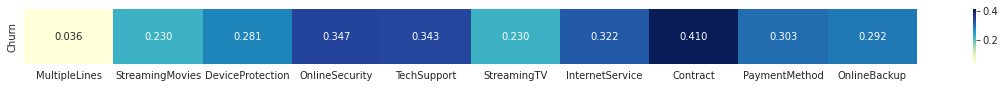

In [62]:
printmd("**Cramers V Heatmap on Polytomous Features and Target: Churn**")
cramers_v_val = pd.DataFrame(index=['Churn'], columns=polytomous_cols)

for j in range(0,len(polytomous_cols)):
    u = cramers_v(df_churn['Churn'], df_churn[polytomous_cols[j]])
    cramers_v_val.loc[:,polytomous_cols[j]] = u

cramers_v_val.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(cramers_v_val,annot=True,fmt='.3f', cmap="YlGnBu")
plt.show()

#### Using Scipy Module

In [63]:
crosstab = pd.crosstab(df_churn['OnlineSecurity'], df_churn['Churn'])
display(crosstab)
printmd(f"Association between OnlineSecurity and Target:Churn **{stats.contingency.association(crosstab, method='cramer')}**")

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


Association between OnlineSecurity and Target:Churn **0.3474004326740552**

<a id='6.5.3'></a>
### 6.5.3 Uncertainty Coefficient
---


AKA **Theil’s U** - an **asymmetric** measure of association between categorical features

It is is based on the conditional entropy between x and y — or in human language, given the value of x, how many possible states does y have, and how often do they occur. 

Formaly marked as U(x|y); Just like Cramer’s V, the output value is on the range of [0,1], where 0 means that feature y provides no information about feature x, and 1 means that feature y provides full information about features x's value 

**Unlike Cramer’s V, it is asymmetric**

So we will not lose any valuable information unlike symmetric tests 

In [64]:
def conditional_entropy(x,y):
  # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = stats.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

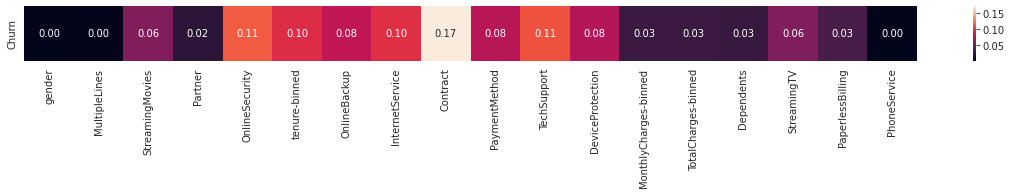

**Contract, OnlineSecurity, TechSupport, tenure-binned are moderately correlated with Churn**

In [65]:
theilu = pd.DataFrame(index=['Churn'], columns=cat_cols)

for j in range(0,len(cat_cols)):
    u = theil_u(df_churn['Churn'].tolist(),df_churn[cat_cols[j]].tolist())
    theilu.loc[:,cat_cols[j]] = u

theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

printmd("**Contract, OnlineSecurity, TechSupport, tenure-binned are moderately correlated with Churn**")            

<a id='6.6'></a>
## 6.6 Collinearity

For categorical variables, multicollinearity can be detected with **Spearman rank correlation coefficient** (ordinal variables) and **chi-square** test (nominal variables)

Spearman's ρ was already performed in a previous section that can be used as a collinearity measure

That's why let's just proceed with **chi-square** here -

<a id='6.6.1'></a>
### 6.6.1 Chi-Square

In [66]:
calculate_chi_square('PaymentMethod','MultipleLines')

Correlation between **PaymentMethod** and **MultipleLines**

p-value : 1.1367151062832025e-81, degree of freedom: 6
probability=0.950, critical=12.592, stat=392.514
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



In [67]:
calculate_chi_square('PaymentMethod','PhoneService')

Correlation between **PaymentMethod** and **PhoneService**

p-value : 0.8621473788722153, degree of freedom: 3
probability=0.950, critical=7.815, stat=0.747
Independent (fail to reject H0)
significance=0.050, p=0.862
Independent (fail to reject H0)
-----------------------------------



In [68]:
calculate_chi_square('PaymentMethod','Contract')

Correlation between **PaymentMethod** and **Contract**

p-value : 4.067638353787387e-213, degree of freedom: 6
probability=0.950, critical=12.592, stat=1001.582
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



<a id='6.7'></a>
## 6.7 Visualization

### Tenure and MonthlyCharges Distribution

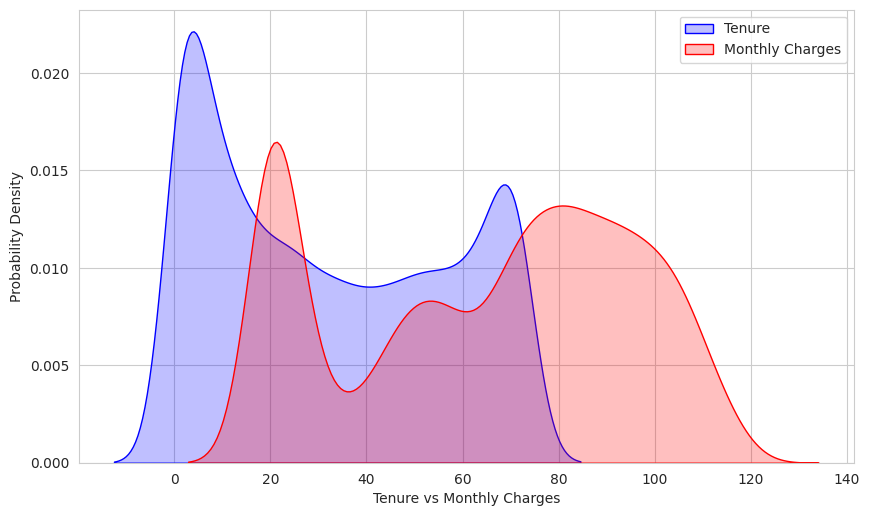

**Both are are not normally distributed, skewed,Tenure has a 
Bi-modal distribution <br>Most users stayed for less than 20 months, 
Monthly Charges for most people is nearly 20 unit**

In [69]:
plt.figure(figsize=(10,6),dpi=100)
sns.kdeplot(df_churn.tenure, color='b', shade=True, Label='Tenure')
sns.kdeplot(df_churn.MonthlyCharges, color='r', shade=True, Label='Monthly Charges')
  
plt.xlabel('Tenure vs Monthly Charges')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

printmd("""**Both are are not normally distributed, skewed,Tenure has a 
Bi-modal distribution <br>Most users stayed for less than 20 months, 
Monthly Charges for most people is nearly 20 unit**""")

In [70]:
# https://stackoverflow.com/a/65242391/11105356

df_g = df_churn.groupby(['StreamingTV', 'Churn']).size().reset_index()
df_g['percentage'] = df_churn.groupby(['StreamingTV', 'Churn']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['StreamingTV', 'Churn', 'Counts', 'Percentage']

fig = px.bar(df_g, x='StreamingTV', y='Counts', 
       color='Churn',
       color_discrete_map={
        'Yes': '#99D594',
        'No': '#FC8D59',
    }, 
    text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

display(fig)
printmd("**Similar ratio between streamer vs non-streamer in churned users**")

**Similar ratio between streamer vs non-streamer in churned users**

### Contract and Churn

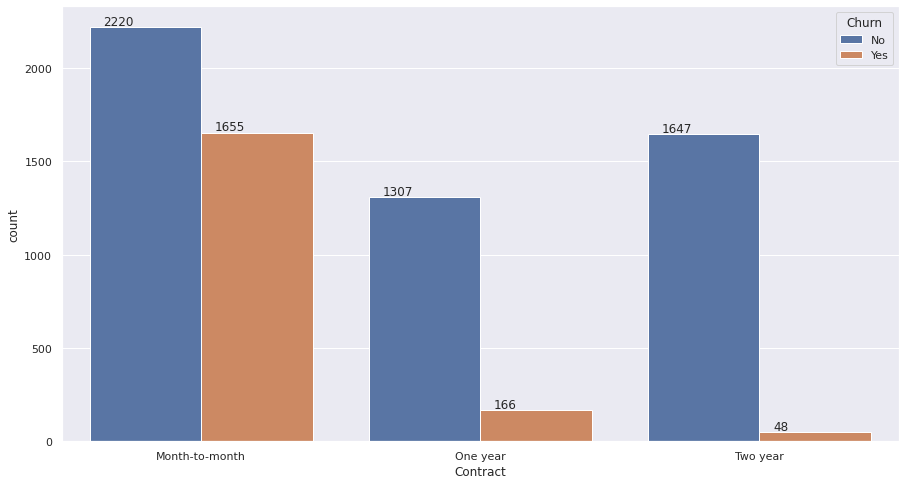

**Most churned users has Month-to-month contract**

In [71]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Contract',hue='Churn',data=df_churn)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

printmd("**Most churned users has Month-to-month contract**")

### OnlineSecurity and Churn

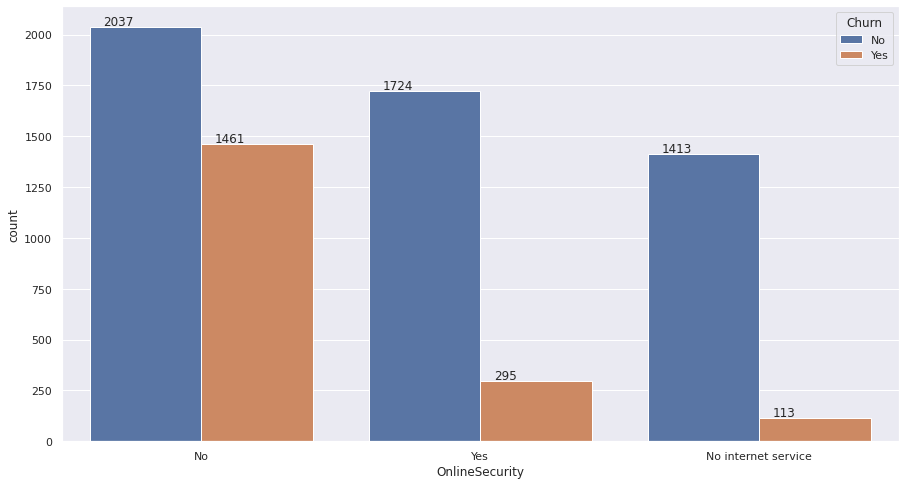

**Most churned users didn't have online security**

In [72]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='OnlineSecurity',hue='Churn',data=df_churn)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

printmd("**Most churned users didn't have online security**")

### Partner and Churn

**Most users who churned does not have a partner in contrast to the users who does**

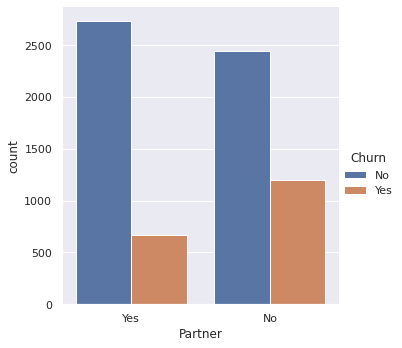

In [73]:
sns.catplot(x='Partner',hue='Churn',data=df_churn, kind="count");

printmd("**Most users who churned does not have a partner in contrast to the users who does**")

### Gender, TotalCharges and Churn

**Gender is uncorrelated with churn rate**

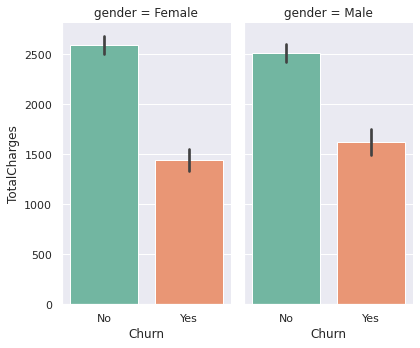

In [74]:
sns.catplot(x='Churn',y='TotalCharges', col = 'gender', data=df_churn,
                kind='bar', aspect=.6, palette='Set2')

printmd("**Gender is uncorrelated with churn rate**")

### Checking Outliers

In [75]:
px.box(df_churn, x="Churn", y="MonthlyCharges")

In [76]:
px.box(df_churn, x="Churn", y="TotalCharges")

In [77]:
px.box(df_churn, x="Churn", y="tenure")

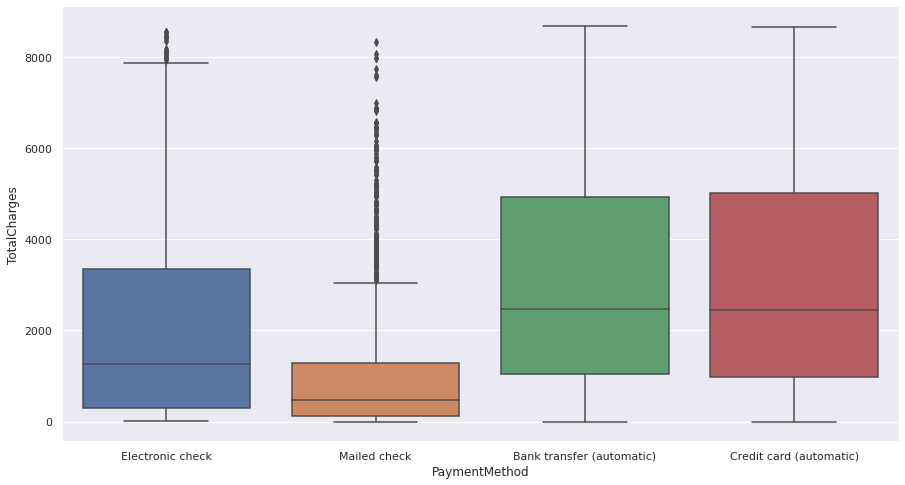

**Total Charges for many users are in extreme level in Mailed Check payment method**

In [78]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="PaymentMethod", y="TotalCharges", data=df_churn)
plt.show()

printmd("**Total Charges for many users are in extreme level in Mailed Check payment method**")

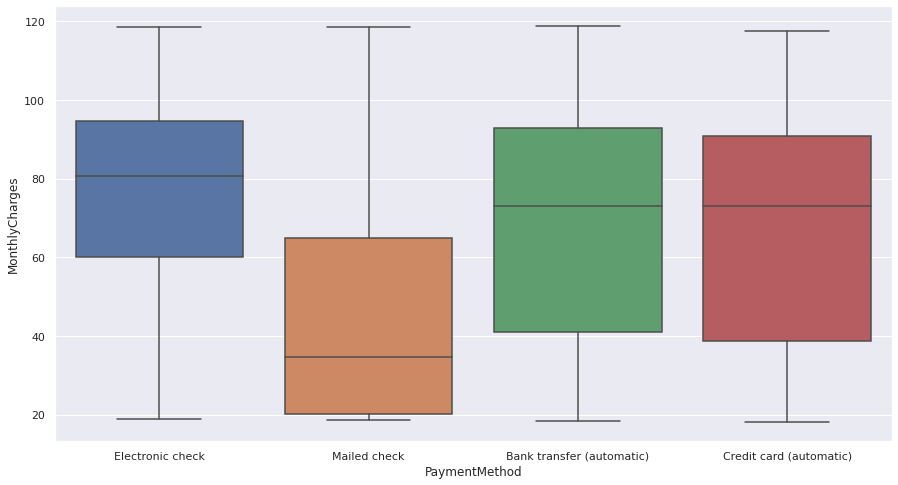

In [79]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="PaymentMethod", y="MonthlyCharges", data=df_churn)
plt.show()

<a id='7'></a>
# 7 Multivariate Analysis

<a id='7.1'></a>
### 7.1 Multicollinearity (Kruskal–Wallis)

For categorical and a continuous variable, multicollinearity can be measured by **t-test** (if the categorical variable has 2 categories, parametric) or **ANOVA** (more than 2 categories, parametric)

**Kruskal–Wallis test** is more commonly used when we have **three or more levels**. For two levels, the **Mann Whitney U Test** is appropriate 

The **parametric equivalent of the Kruskal–Wallis test** is the one-way analysis of variance (ANOVA)

Hypothses - 

* H0: All sample distributions are equal.
* H1: One or more sample distributions are not equal.


In [80]:
# compare samples
stat, p = stats.kruskal(df_churn['TotalCharges'], df_churn['tenure'], df_churn['MonthlyCharges'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=13184.759, p=0.000
Different distributions (reject H0)


In [81]:
# compare samples
stat, p = stats.kruskal(df_churn['DeviceProtection'], df_churn['StreamingMovies'], df_churn['PhoneService'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=4696.340, p=0.000
Different distributions (reject H0)


In [82]:
# compare samples
stat, p = stats.kruskal(df_churn['Contract'], df_churn['PaymentMethod'], df_churn['PhoneService'], df_churn['InternetService'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=22407.812, p=0.000
Different distributions (reject H0)


<a id='7.2'></a>
## 7.2 Frequency Distribution

In [83]:
def multivariate_analysis(cat_var_1, cat_var_2, cat_var_3, target_variable=df_churn.Churn):
    
    fig,ax = plt.subplots(1,1,figsize = (18,5))
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = [cat_var_1, cat_var_2, cat_var_3],
                                        columns = target_variable, normalize = "index")*100                            
    cat_grouped_by_cat_target.rename({"Yes":"% Churn", "No":"% Not Churn"}, axis = 1, inplace = True)
    cat_grouped_by_cat_target.plot.bar(color = ["green", "red"],ax=ax)
    ax.set_xlabel(f"{cat_var_1.name}, {cat_var_2.name}, {cat_var_3.name}", fontsize = font_size)
    ax.set_ylabel("Relative Frequency(%)", fontsize = font_size)
    ax.tick_params(axis="x", labelsize=font_size)
    ax.tick_params(axis="y", labelsize=font_size)
    plt.legend(loc = "best")
    return plt.show()

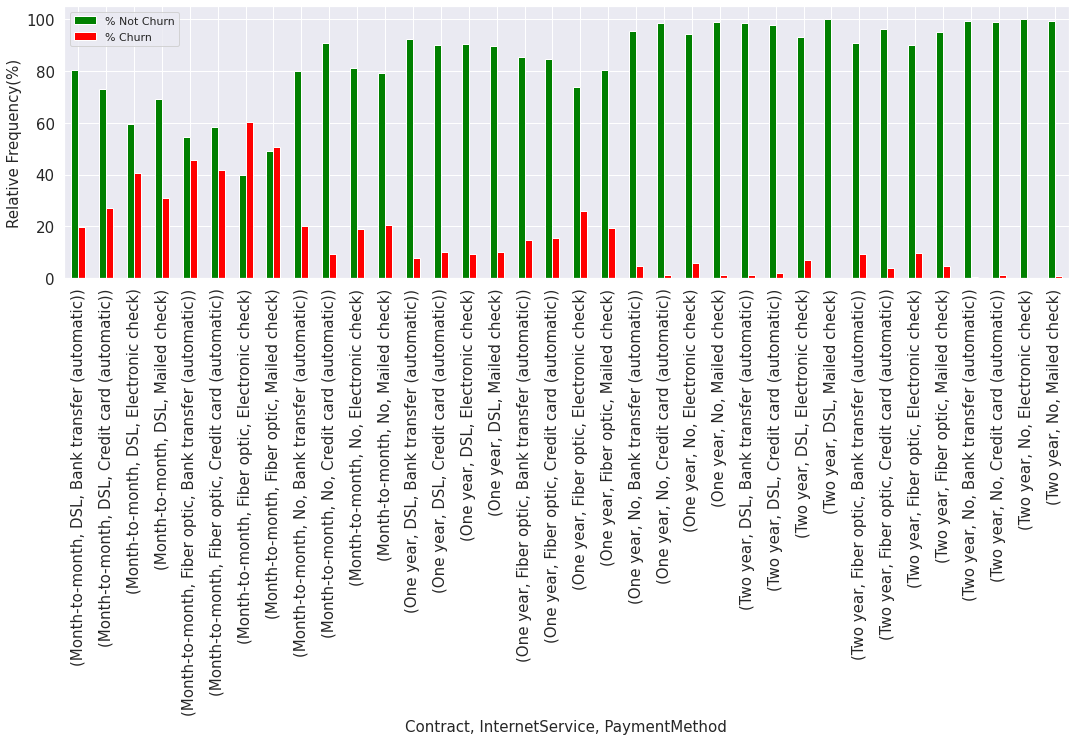

### Findings: Most of the users who churned had a Month-to-month contract and had internet service

In [84]:
multivariate_analysis(df_churn.Contract, df_churn.InternetService, df_churn.PaymentMethod)
printmd("### Findings: Most of the users who churned had a Month-to-month contract and had internet service")

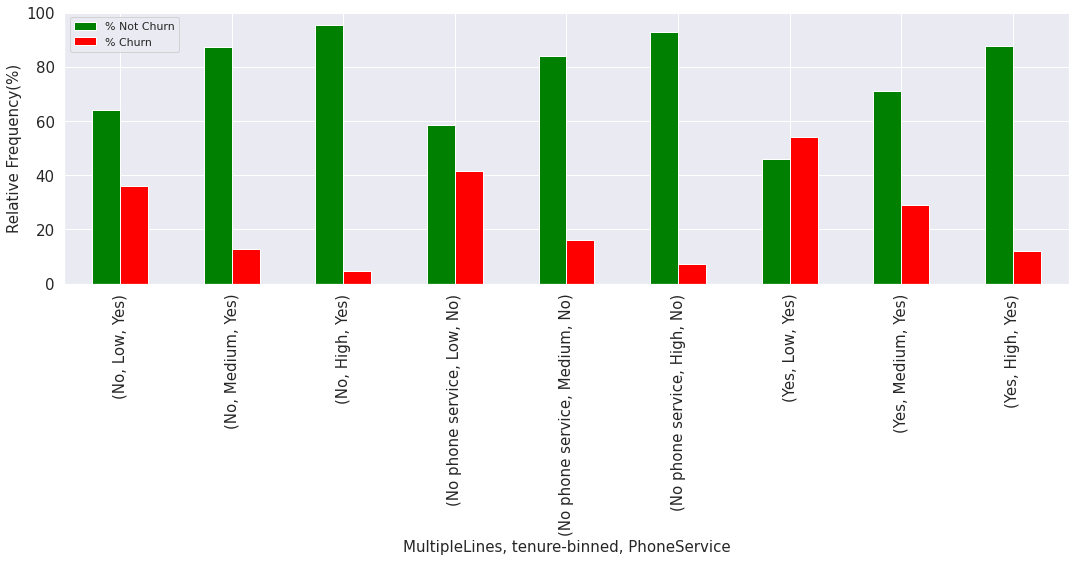

## Findings: Most of the users who churned had phone service

In [85]:
multivariate_analysis(df_churn.MultipleLines, df_churn['tenure-binned'], df_churn.PhoneService)
printmd("## Findings: Most of the users who churned had phone service")

<a id='7.3'></a>
## 7.3 Churn Count Distribution

In [86]:
def plot_counting_distribution(cardinality_value):

    #label encoding binary columns
    le = LabelEncoder()

    tmp_churn = df_churn[df_churn['Churn'] == 'Yes']
    tmp_no_churn = df_churn[df_churn['Churn'] == 'No']

    selected_columns = df_churn.nunique()[df_churn.nunique() == cardinality_value].keys()

    for col in selected_columns :
        tmp_churn[col] = le.fit_transform(tmp_churn[col])


    data_frame_x = tmp_churn[selected_columns].sum().reset_index()
    data_frame_x.columns = ["feature","Yes"]
    data_frame_x["No"] = tmp_churn.shape[0]  - data_frame_x["Yes"]
    data_frame_x = data_frame_x[data_frame_x["feature"] != "Churn"]

    #count of 1's(yes)
    trace1 = go.Scatterpolar(r=data_frame_x["Yes"].values.tolist(), 
                          theta=data_frame_x["feature"].tolist(),
                          fill="toself", name="Churn 1's",
                          mode="markers+lines", visible=True,
                          marker=dict(size=5)
                          )

    #count of 0's(No)
    trace2 = go.Scatterpolar(r=data_frame_x["No"].values.tolist(),
                          theta=data_frame_x["feature"].tolist(),
                          fill="toself",name="Churn 0's",
                          mode="markers+lines", visible=True,
                          marker=dict(size = 5)
                          ) 
    for col in selected_columns :
        tmp_no_churn[col] = le.fit_transform(tmp_no_churn[col])

    data_frame_x = tmp_no_churn[selected_columns].sum().reset_index()
    data_frame_x.columns  = ["feature","Yes"]
    data_frame_x["No"]    = tmp_no_churn.shape[0]  - data_frame_x["Yes"]
    data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]

    #count of 1's(yes)
    trace3 = go.Scatterpolar(r = data_frame_x["Yes"].values.tolist(),
                          theta = data_frame_x["feature"].tolist(),
                          fill  = "toself",name = "NoChurn 1's",
                          mode = "markers+lines", visible=False,
                          marker = dict(size = 5)
                          )

    #count of 0's(No)
    trace4 = go.Scatterpolar(r = data_frame_x["No"].values.tolist(),
                          theta = data_frame_x["feature"].tolist(),
                          fill  = "toself",name = "NoChurn 0's",
                          mode = "markers+lines", visible=False,
                          marker = dict(size = 5)
                          ) 

    data = [trace1, trace2, trace3, trace4]

    updatemenus = list([
      dict(active=0,
          x=-0.15,
          buttons=list([  
              dict(
                  label = 'Churn Dist',
                  method = 'update',
                  args = [{'visible': [True, True, False, False]}, 
                      {'title': f'Customer Churn Binary Counting Distribution' }]),

              dict(
                    label = 'No-Churn Dist',
                  method = 'update',
                  args = [{'visible': [False, False, True, True]},
                      {'title': f'No Customer Churn Binary Counting Distribution'}]),

          ]),
      )
    ])

    layout = dict(title='ScatterPolar Distribution of Churn and Non-Churn Customers (Select from Dropdown)', 
                showlegend=False,
                updatemenus=updatemenus)

    fig = dict(data=data, layout=layout)

    pio.show(fig)

# Thanks to : https://www.kaggle.com/kabure/insightful-eda-churn-customers-models-pipeline#Feature-Engineering

<a id='7.3.1'></a>
###  7.3.1 Features With Cardinality = 2

In [87]:
plot_counting_distribution(2)

<a id='7.3.2'></a>
###  7.3.2 Features With Cardinality = 3

In [88]:
plot_counting_distribution(3)

<a id='8'></a>
# 8 Save Cleaned Dataset


##  Encode Target variable

In [89]:
df_churn_cleaned = df_churn.copy()
df_churn_cleaned.Churn[df_churn_cleaned.Churn.str.lower() == 'yes'] = 1
df_churn_cleaned.Churn[df_churn_cleaned.Churn.str.lower() == 'no'] = 0

df_churn_cleaned['Churn'] = df_churn_cleaned['Churn'].astype('float')

In [90]:
df_churn_cleaned.to_csv("Telco-Customer-Churn-dataset-cleaned.csv", index=False)

<a id='9'></a>
# 9 Conclusion

From the above analysis, we can conclude: 

* Customer Churn is gender neutral, i.e., Gender has no correlation with the target
* Number of months the customer has stayed with the company (**tenure**) and the contract term of the customer (**contract**) are the most important features that have strong correlation with churn of the customer
* OnlineSecurity, TechSupport, InternetService, PaymentMethod are moderately correlated with customer churn

## What's Next ?

**Model building, hyperparameter optimization and deployment**

##### I applied XGBoost, Catboost and LightGBM and performed hyperparameter tuning using Optuna for all of the classifiers. Also I demonstrated how to save and load the model with their standard format.

##### Please visit this notebook to see the rest of the project - 


### [Churn Prediction Part 2 : Triple Boost Stacking Ensemble + Optuna Tuning](https://www.kaggle.com/ahmedshahriarsakib/churn-prediction-part2-triple-boost-stack-optuna)


#### Also I deployed the project using [**streamlit**](https://streamlit.io)

#### Streamlit App Preview

![Telco Customer Churn Prediction Streamlit](https://user-images.githubusercontent.com/40615350/142819900-60053284-5266-4a66-87a3-cddcb2f0d929.gif "Telco Customer Churn Prediction Streamlit")

---

#### Please click the button below if you want to check the live app

[![Live in Streamlit](https://static.streamlit.io/badges/streamlit_badge_black_white.svg)](https://share.streamlit.io//ahmedshahriar/Telco-Customer-Churn-Prediction-Streamlit-App/main/app.py)

---

### If you like this project please feel free to fork the kernel,use the code, share the notebook and give an upvote. If you have any questions or suggestions to improve the analysis please comment below 

<a id='10'></a>
# 10 Reference



1. [Statstest](https://www.statstest.com/relationship)
2. [Parametric nonparametric tests healthknowledge - healthknowledge.org](https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1b-statistical-methods/parametric-nonparametric-tests)
3. [Feature Selection Method For Machine Learning - machinelearningmastery](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data)
4. [The Search for Categorical Correlation - towardsdatascience](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)
5. [Nonparametric statistical significance](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)
6. [Eta-squared - ResearchGate](https://www.researchgate.net/post/Can_I_use_Pearsons_correlation_coefficient_to_know_the_relation_between_perception_and_gender_age_income)
7. [T-test examples - analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/07/t-test-performing-hypothesis-testing-with-python/)
8. [Nonparametric Statistical Hypothesis Tests - machinelearningmastery](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)
9. [Kendalls-tau](https://www.statstest.com/kendalls-tau/)
10. [Chi-Squared Test for Machine Learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)
11. [Parametric-and-non-parametric-data](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/parametric-and-non-parametric-data/)
12. [Mann-whitney-u-test for non-parametric](https://www.statisticshowto.com/mann-whitney-u-test/)
13. [Point-biserial correlation, Phi, & Cramer's V](http://web.pdx.edu/~newsomj/pa551/lectur15.htm)
14. [Theia's Uncertainity](https://en.wikipedia.org/wiki/Uncertainty_coefficient)
15. [Non-parametric-correlation-for-continuous-and-dichotomous-variables](https://stats.stackexchange.com/questions/86637/non-parametric-correlation-for-continuous-and-dichotomous-variables)
16. [Effect Size Wiki](https://en.wikipedia.org/wiki/Effect_size)
17. [Categorical correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)
18. [Correlation_ratio dython](http://shakedzy.xyz/dython/modules/nominal/#correlation_ratio)
19. [Tetrachoric’s correlation](https://junye0798.com/post/everythin-you-need-to-know-about-correlation/)
20. [Chi-square](http://web.pdx.edu/~newsomj/pa551/lectur11.htm)
21. [Kruskal-wallis - statisticshowto](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/kruskal-wallis/)
22. [Everything You Need To Know About Correlation](https://junye0798.com/post/everythin-you-need-to-know-about-correlation)
